## Introduction

This project aims to utilize data from EdGap.org and the National Center for Education Statistics to analyze how an inequality of educational opportunity affects student's ACT performance.

All data and code is hosted on Github at https://github.com/MCaiGH/Education_Gap
Our first dataset EdGap_data.xlsx comes from EdGap.org, it consists of data from 2016 on several socioeconomic characteristics of multiple school districts as well as the average SAT and ACT performance. EdGap sources its socioeconomic data from the Census Bureau's American Community Survey, and the ACT and SAT data come from each state's Department of Education or some other public source. The second dataset ccd_sch_029_1617_w_1a_11212017.csv isn't located in the repository as it is too large to be hosted, it can be accessed in a Google Drive via this link https://drive.google.com/file/d/1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP/view?usp=sharing This dataset contains basic identifying information about schools that comes from the National Center of Education Statistics https://nces.ed.gov/ccd/pubschuniv.asp.

## Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load clean data

In [7]:
train_df = pd.read_csv('https://raw.githubusercontent.com/MCaiGH/Education_Gap/main/training_data.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/MCaiGH/Education_Gap/main/test_data.csv')

Review the contents of the data set.

In [8]:
train_df.describe()

,Unnamed: 0,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,zip_code,average_act
count,6300.000000,6.300000e+03,6300.000000,6300.000000,6300.000000,6300.000000,6.300000e+03,6300.000000,6300.000000
mean,4008.171587,3.330859e+11,0.000268,-0.000242,-0.001636,-0.000795,1.105289e-16,44966.207778,20.208669
std,2316.692887,1.329694e+11,0.999419,0.999474,1.000514,0.999848,1.000079e+00,24172.097652,2.541962
min,1.000000,1.000080e+11,-1.662343,-2.880431,-3.252629,-2.133973,-1.764022e+00,1001.000000,12.362637
25%,1982.750000,2.104815e+11,-0.678594,-0.712786,-0.558024,-0.638887,-7.620378e-01,28450.750000,18.632479
50%,4021.500000,3.600087e+11,-0.216793,-0.088045,0.169741,-0.214882,-1.642368e-01,45249.500000,20.400000
75%,6035.250000,4.700148e+11,0.413651,0.649348,0.727370,0.393746,6.448109e-01,62449.250000,21.935287
max,7985.000000,5.605830e+11,8.322668,2.590481,1.858728,7.221085,2.439138e+00,99403.000000,32.362637


In [9]:
test_df.describe()

,Unnamed: 0,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,zip_code,average_act
count,1575.000000,1.575000e+03,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,3947.892063,3.294081e+11,-0.020108,-0.009208,0.000621,-0.008041,0.000750,44569.779048,20.269948
std,2286.083163,1.311435e+11,0.916748,0.994063,0.968474,1.017530,0.999781,23622.569299,2.489815
min,0.000000,1.000016e+11,-1.662343,-2.870625,-3.240014,-1.702664,-1.764022,1022.000000,12.704518
25%,2000.000000,2.105520e+11,-0.649316,-0.717110,-0.556988,-0.645145,-0.746574,28529.000000,18.702259
50%,3939.000000,3.600078e+11,-0.234851,-0.069180,0.164495,-0.223786,-0.168738,45305.000000,20.500000
75%,5850.500000,4.220220e+11,0.403432,0.613667,0.708690,0.363577,0.611484,62048.000000,21.910867
max,7978.000000,5.605090e+11,6.215502,2.511892,1.858728,5.907463,2.438191,99350.000000,29.700000


## State your question

How does multiple economic factors correlate with average ACT score when evaluated with a linear regression, decision tree, or random forest?

## Analysis

Linear Regression

In [10]:
reg = LinearRegression()
reg.fit(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']], train_df['average_act'])
reg.coef_

array([-0.11342999,  0.27966032, -0.01535116,  0.00514851, -1.82182027])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'rate_unemployment'),
  Text(1, 0, 'percent_college'),
  Text(2, 0, 'percent_married'),
  Text(3, 0, 'median_income'),
  Text(4, 0, 'percent_lunch')])

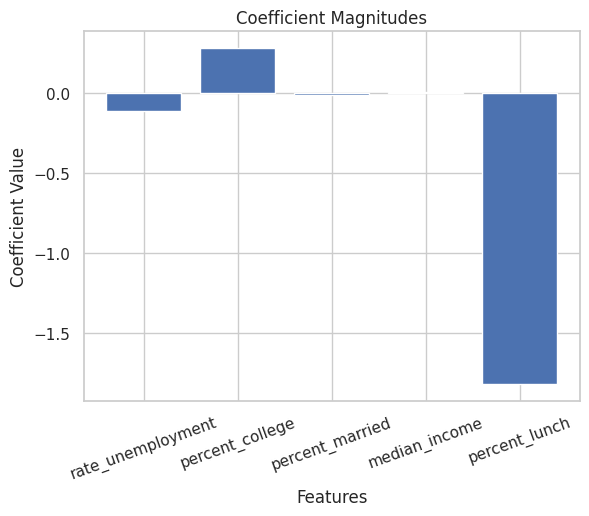

In [20]:
coefficients = reg.coef_
features = train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']].columns

plt.bar(features, coefficients)
plt.title("Coefficient Magnitudes")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=20)



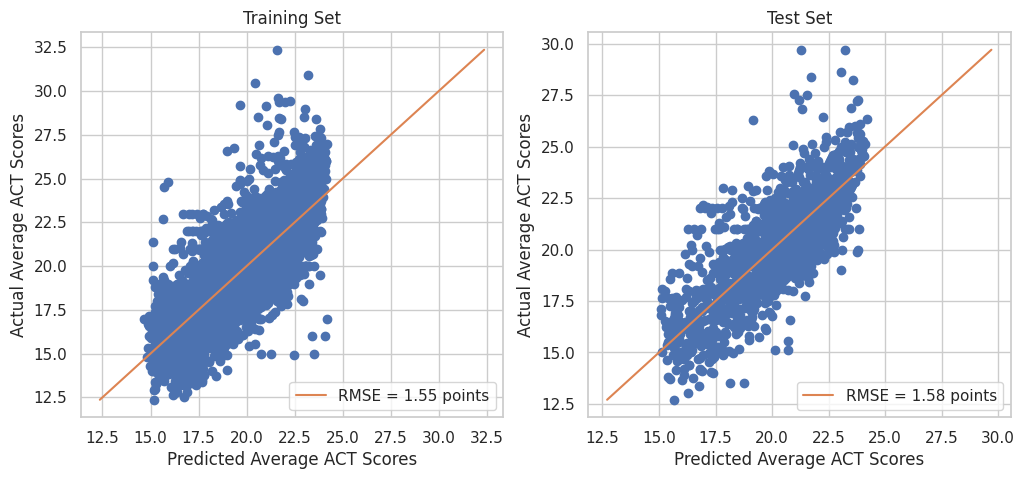

In [12]:
y_pred_train = reg.predict(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])
y_pred_test = reg.predict(test_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])

one_train = np.linspace(train_df['average_act'].min(), train_df['average_act'].max(), 100)
one_test = np.linspace(test_df['average_act'].min(), test_df['average_act'].max(), 100)
rmse_train = np.sqrt(np.mean((y_pred_train - train_df['average_act'])**2))
rmse_test = np.sqrt(np.mean((y_pred_test - test_df['average_act'])**2))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_train, train_df['average_act'], 'o')
ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted Average ACT Scores")
ax1.set_ylabel("Actual Average ACT Scores")
ax1.legend()

ax2.plot(y_pred_test, test_df['average_act'], 'o')
ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted Average ACT Scores")
ax2.set_ylabel("Actual Average ACT Scores")
ax2.legend()

fig.set_size_inches(12, 5)


Decision Tree Regression

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5)
tree_reg.fit(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']], train_df['average_act'])
tree_reg.feature_importances_

array([0.03701076, 0.07739068, 0.04176776, 0.03166563, 0.81216517])

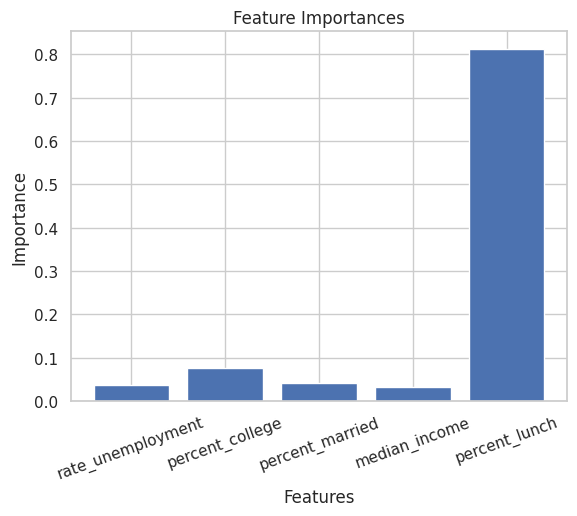

In [14]:
importance = tree_reg.feature_importances_
features = train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']].columns

plt.bar(features, importance)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=20)

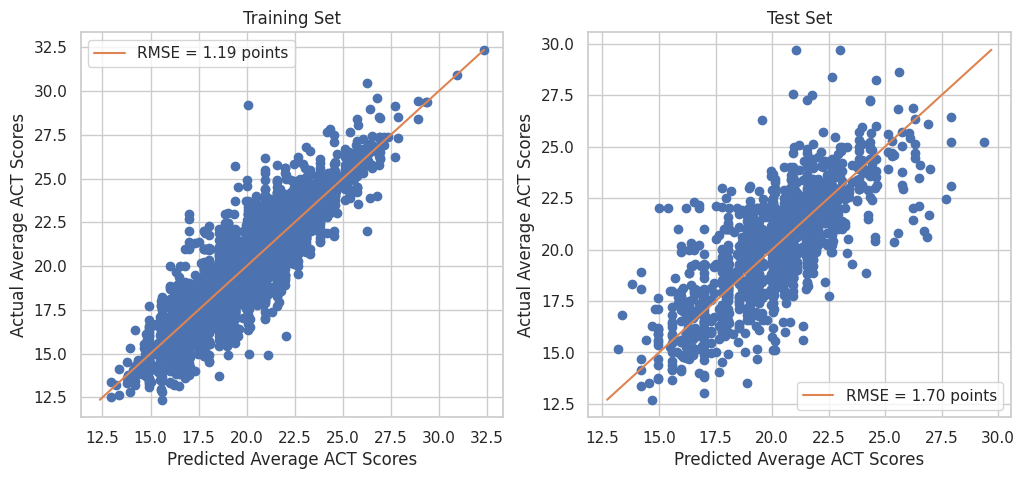

In [15]:
y_pred_tree_train = tree_reg.predict(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])
y_pred_tree_test = tree_reg.predict(test_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])

one_train = np.linspace(train_df['average_act'].min(), train_df['average_act'].max(), 100)
one_test = np.linspace(test_df['average_act'].min(), test_df['average_act'].max(), 100)
rmse_train = np.sqrt(np.mean((y_pred_tree_train - train_df['average_act'])**2))
rmse_test = np.sqrt(np.mean((y_pred_tree_test - test_df['average_act'])**2))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_tree_train, train_df['average_act'], 'o')
ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted Average ACT Scores")
ax1.set_ylabel("Actual Average ACT Scores")
ax1.legend()

ax2.plot(y_pred_tree_test, test_df['average_act'], 'o')
ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted Average ACT Scores")
ax2.set_ylabel("Actual Average ACT Scores")
ax2.legend()
fig.set_size_inches(12, 5)

Random Forest Regression

In [16]:
rf_reg = RandomForestRegressor(n_estimators=100).fit(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']], train_df['average_act'])
rf_reg.feature_importances_


array([0.06896823, 0.10221423, 0.07425992, 0.06800433, 0.68655329])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'rate_unemployment'),
  Text(1, 0, 'percent_college'),
  Text(2, 0, 'percent_married'),
  Text(3, 0, 'median_income'),
  Text(4, 0, 'percent_lunch')])

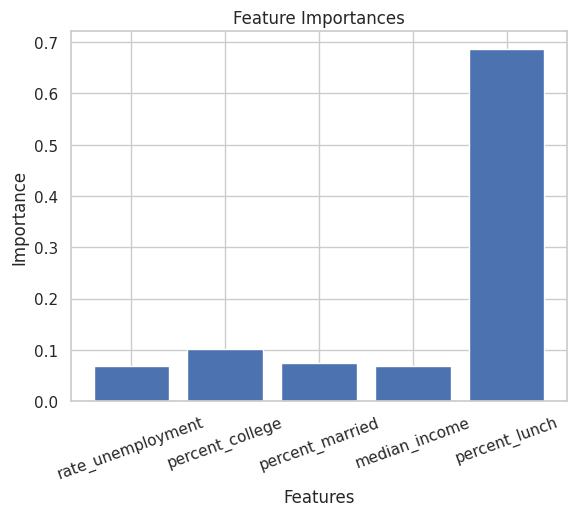

In [17]:
importance = rf_reg.feature_importances_
elements = train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']].columns
plt.bar(elements, importance)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=20)

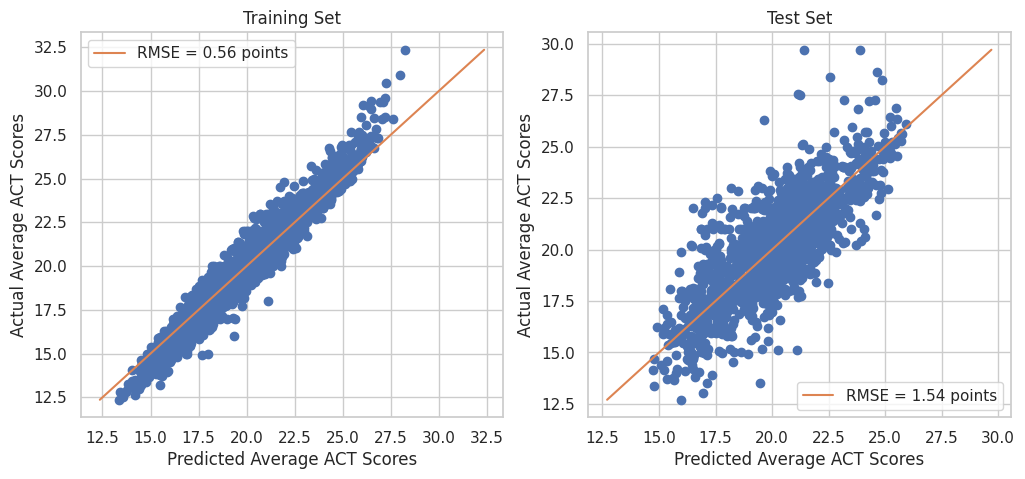

In [18]:
y_pred_train_rf = rf_reg.predict(train_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])
y_pred_test_rf = rf_reg.predict(test_df[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']])


one_train = np.linspace(train_df['average_act'].min(), train_df['average_act'].max(), 100)
one_test = np.linspace(test_df['average_act'].min(), test_df['average_act'].max(), 100)
rmse_train = np.sqrt(np.mean((y_pred_train_rf - train_df['average_act'])**2))
rmse_test = np.sqrt(np.mean((y_pred_test_rf - test_df['average_act'])**2))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_train_rf, train_df['average_act'], 'o')
ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted Average ACT Scores")
ax1.set_ylabel("Actual Average ACT Scores")
ax1.legend()

ax2.plot(y_pred_test_rf, test_df['average_act'], 'o')
ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted Average ACT Scores")
ax2.set_ylabel("Actual Average ACT Scores")
ax2.legend()
fig.set_size_inches(12, 5)



## Conclusion

There is a noticable relationship between economic factors and average ACT score, according to all three regression models I created, there is a relationship that can be modeled to predict ACT score. Across all three models, the average root mean square error for the test set was 1.61 which means that on average, my model's prediction of ACT score differered from the real ACT score by +- 1.61 points.
In all three models the most significant predictor for ACT score out of all the economic features is percent_lunch by a significant margin. This value in our linear regression had a negative relationship with ACT score meaning that an increase in the percentage of students who receive free or reduced price lunch will correlate with a decrease in average ACT score in the census zone. The other variables did not have as significant of an impact on average ACT score with unemployment rate having a slight negative correlation, percentage of adults attending college having a moderate positive correlation, and median income/percent married having little to no correlation.
This trend is also displayed in our non linear regression models with percent_lunch having the highest importance value and the other features having much lower importance towards average ACT.